In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from datasets_utils import get_luxury_data, get_tech_data, get_retail_data, get_big_basket_data
from preprocessing.utils import (
    remove_HTML,
    remove_punctuation,
    keep_alpha_numerical,
    remove_space,
    remove_stopwords,
    apply_lemmetization,
    is_sentence_in_boundaries,
    count_words,
    get_most_common_words,
    get_top_ngrams,
)
from eda.utils import get_child_categories_count_by_parent_categories

In [2]:
luxury_data = get_luxury_data()
tech_data = get_tech_data()
retail_data = get_retail_data()
big_basket_data = get_big_basket_data()

datasets = [big_basket_data, retail_data, luxury_data, tech_data]
dataset_names = ['Big basket', 'Retail', 'Luxury', 'Tech']

for i, dataset in enumerate(datasets):
    print(f"Size of {dataset_names[i]} {dataset.shape}")

Size of Big basket (27440, 2)
Size of Retail (21634, 2)
Size of Luxury (4963, 2)
Size of Tech (23768, 2)


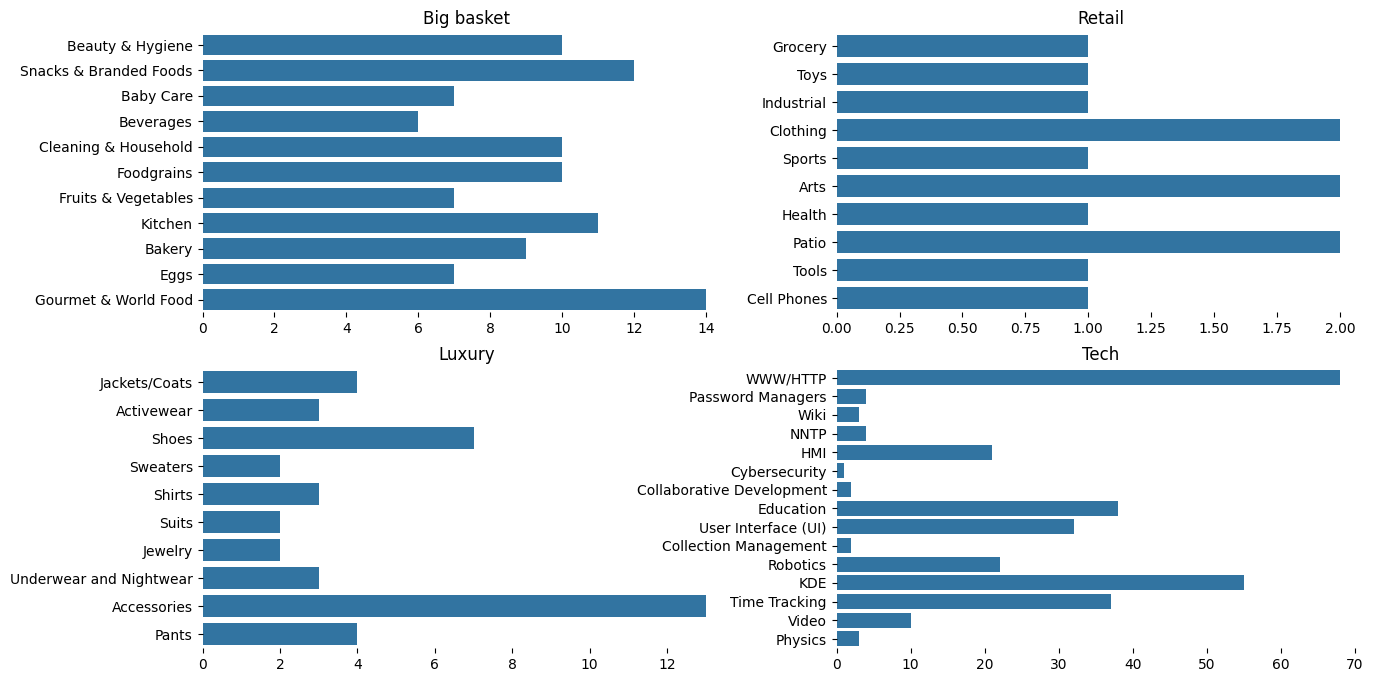

In [5]:
def plot_num_of_unique_child_categories_per_parent_category(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        categories_counts = get_child_categories_count_by_parent_categories(data[i])
        keys = categories_counts['parent_category']
        vals = categories_counts['count']
        
        ax = sns.barplot(x=vals, y=keys, ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_num_of_unique_child_categories_per_parent_category(
    data=datasets,
    names=dataset_names,
)

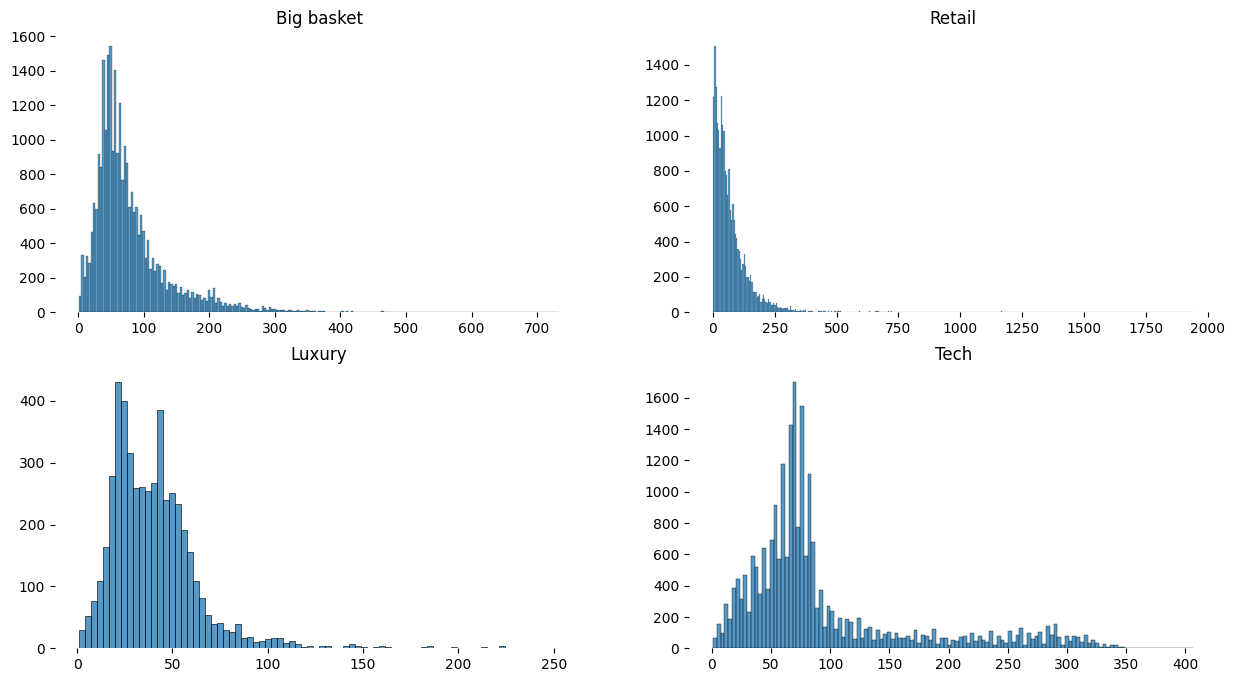

In [7]:
def plot_num_of_tokens_per_description(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        ax = sns.histplot(data[i]["description"].apply(count_words), ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_num_of_tokens_per_description(
    data=datasets,
    names=dataset_names,
)

/tmp/ipykernel_18587/1269192428.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts = new_data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[:15]
/tmp/ipykernel_18587/1269192428.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts = new_data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[:15]
/tmp/ipykern

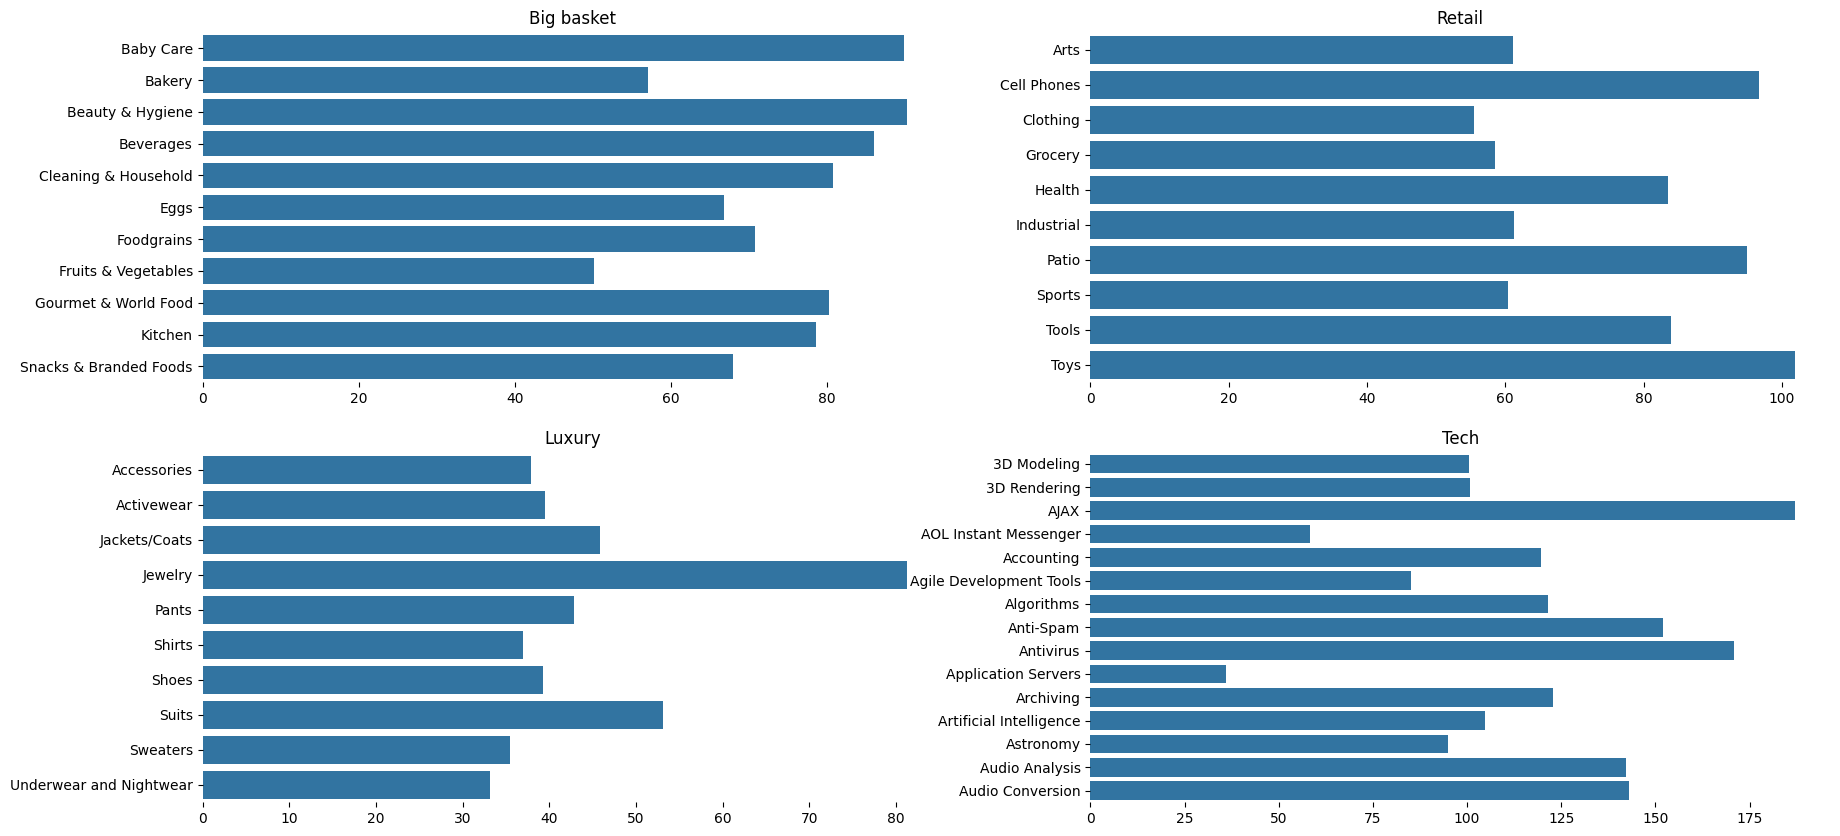

In [14]:
def plot_num_of_tokens_per_description_grouped_by_parent_category(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(21, 10))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        new_data = data[i].copy()
        new_data['parent_category'] = new_data['category'].apply(lambda x: x[0])
        counts = new_data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[:15]
        keys = list(counts.keys())
        vals = [counts[k] for k in keys]
        ax = sns.barplot(x=vals, y=keys, ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_num_of_tokens_per_description_grouped_by_parent_category(
    data=datasets,
    names=dataset_names,
)

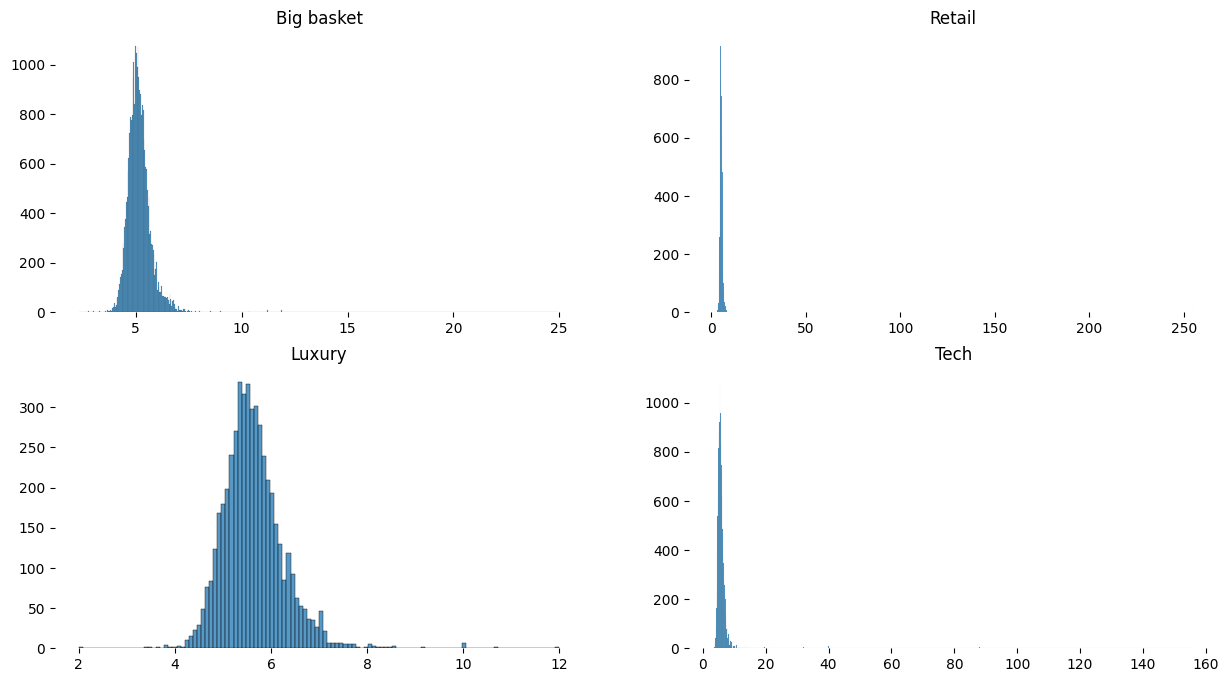

In [26]:
def plot_mean_char_len(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 8))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        display = data[i]['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens]))
        ax = sns.histplot(display, ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_mean_char_len(
    data=datasets,
    names=dataset_names,
)

/tmp/ipykernel_18587/738666149.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \
/tmp/ipykernel_18587/738666149.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \
/tmp/ipykernel_18587/738666149.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behav

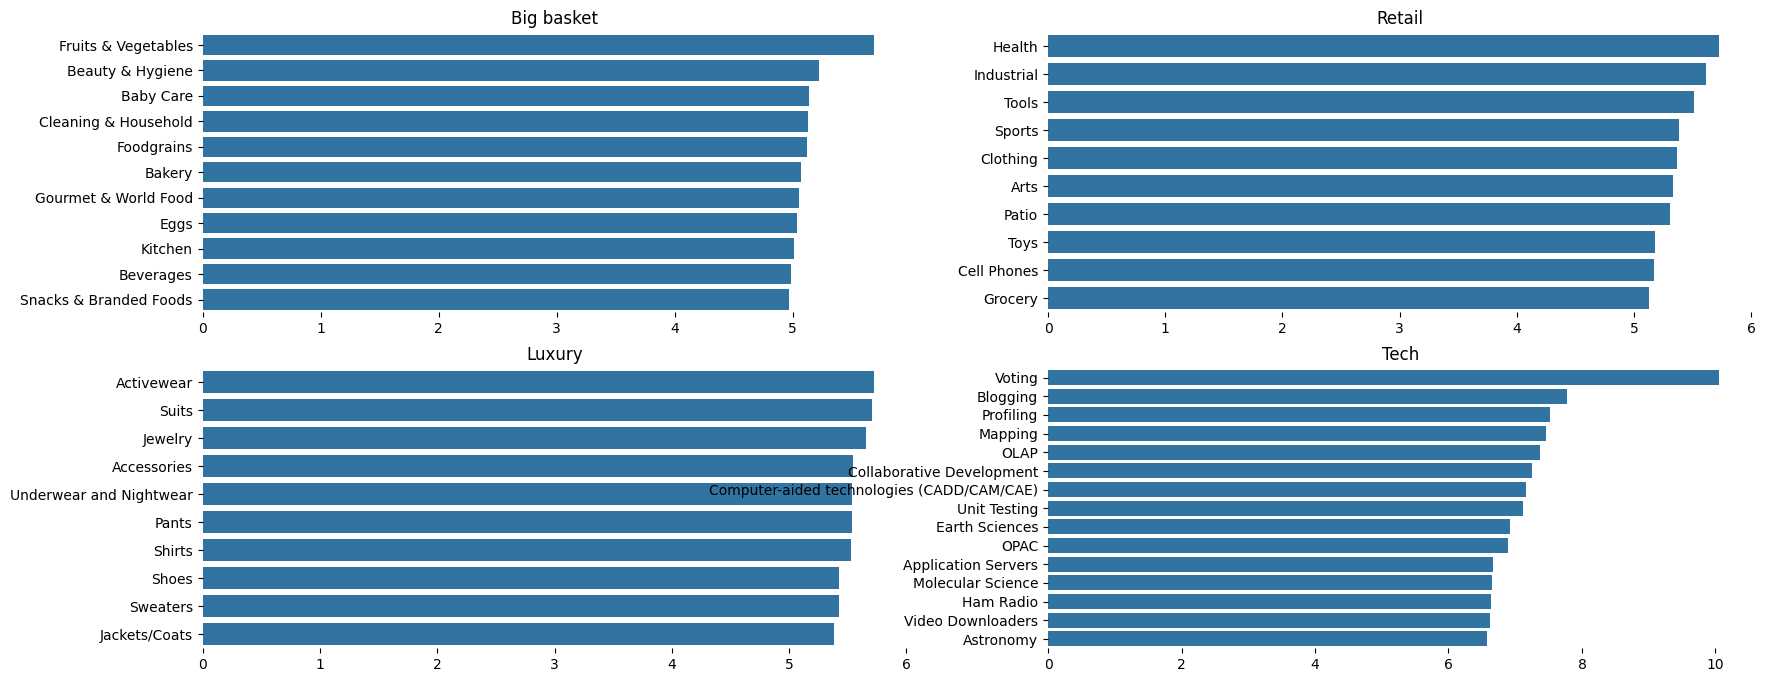

In [43]:
def plot_mean_char_len_per_parent_category(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        new_data = data[i].copy()
        new_data['parent_category'] = new_data['category'].apply(lambda x: x[0])
        chars_count_per_parent_category = new_data.groupby(['parent_category']) \
            .apply(lambda row: row['description'].str.split().values) \
            .apply(lambda x: np.mean([len(j) for i in x for j in i]))
        chars_count_per_parent_category = chars_count_per_parent_category.reset_index()
        chars_count_per_parent_category = chars_count_per_parent_category.rename(columns={ 0: 'count' })
        chars_count_per_parent_category = chars_count_per_parent_category.sort_values(by='count', ascending=False)
        chars_count_per_parent_category = chars_count_per_parent_category[:15]
        keys = chars_count_per_parent_category['parent_category']
        vals = chars_count_per_parent_category['count']
        ax = sns.barplot(x=vals, y=keys, ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_mean_char_len_per_parent_category(
    data=datasets,
    names=dataset_names,
)

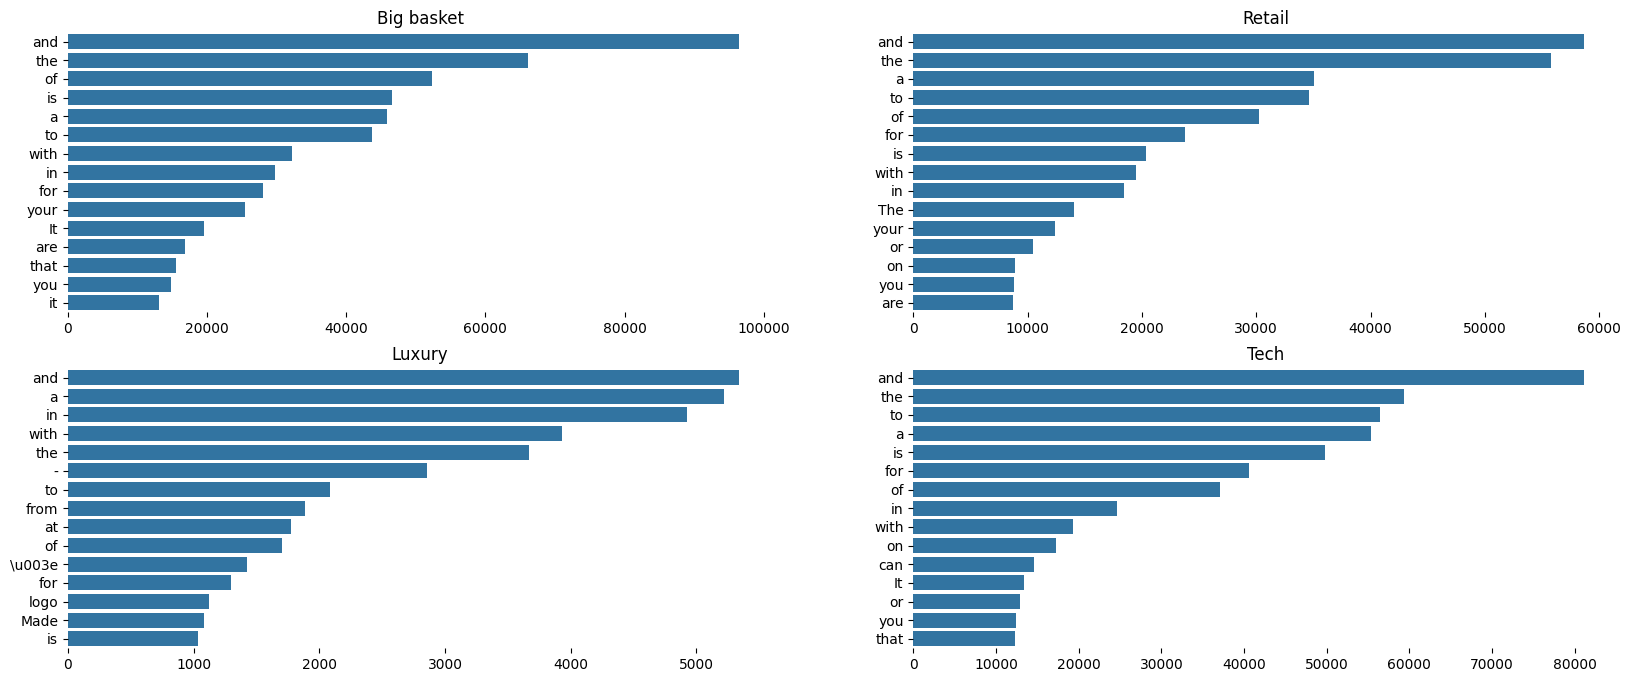

In [44]:
def plot_top_15_words(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        x, y = get_most_common_words(data[i], n=15)
        ax = sns.barplot(x=y, y=x, ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_top_15_words(
    data=datasets,
    names=dataset_names,
)

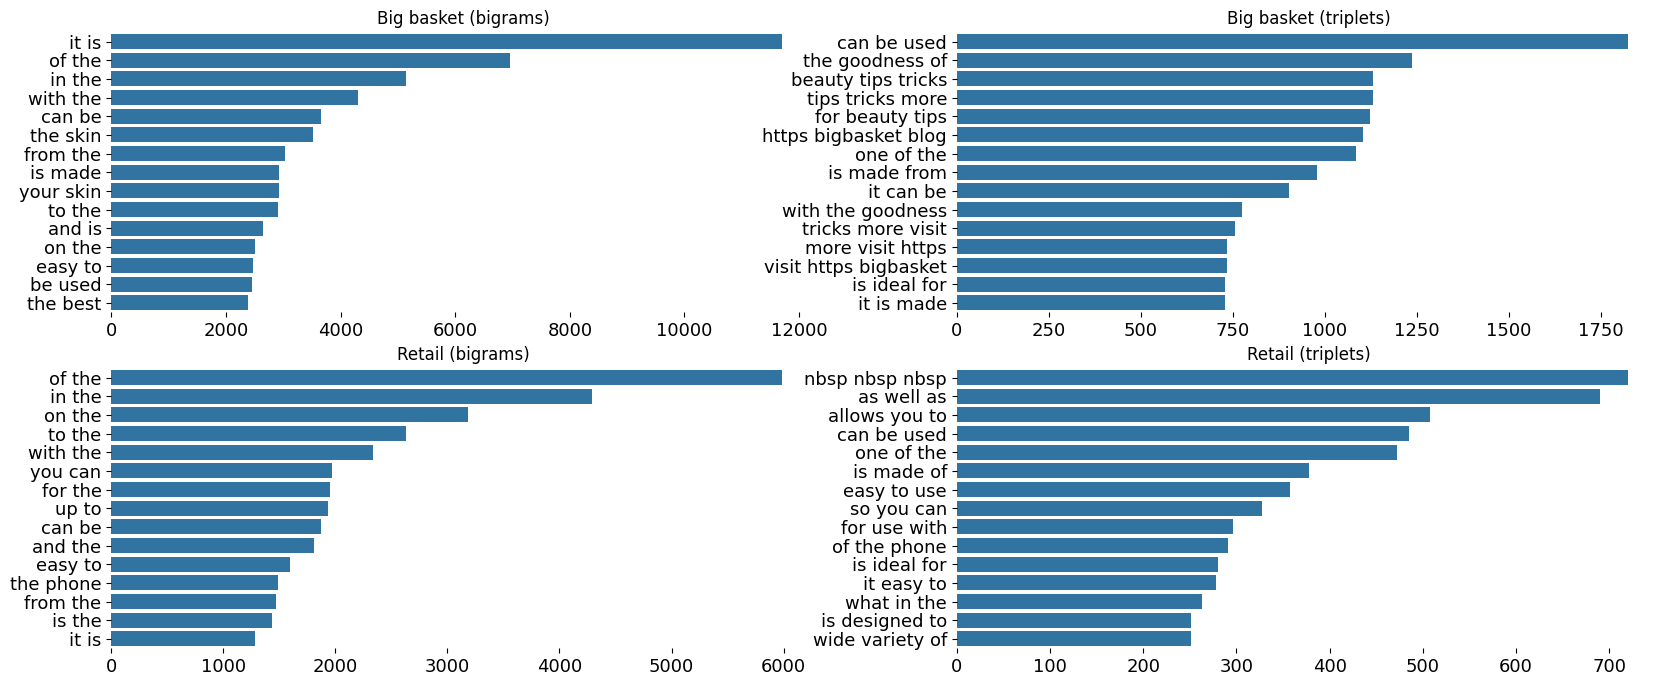

In [51]:
def plot_ngrams(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 8))
    axs = [i for ax in axs for i in ax]

    i = 0

    for df, name in zip(data, names):
        bigrams = get_top_ngrams(df, n=2, k=15)
        triplets = get_top_ngrams(df, n=3, k=15)

        x, y = map(list,zip(*bigrams))
        ax_bigrams = sns.barplot(x=y,y=x, ax=axs[i])
        ax_bigrams.tick_params(labelsize=13)
        ax_bigrams.spines['top'].set_visible(False)
        ax_bigrams.spines['right'].set_visible(False)
        ax_bigrams.spines['bottom'].set_visible(False)
        ax_bigrams.spines['left'].set_visible(False)
        ax_bigrams.set_title(f"{name} (bigrams)")
        ax_bigrams.set_ylabel("")
        ax_bigrams.set_xlabel("")

        i += 1

        x, y = map(list,zip(*triplets))
        ax_triplets = sns.barplot(x=y,y=x, ax=axs[i])
        ax_triplets.tick_params(labelsize=13)
        ax_triplets.spines['top'].set_visible(False)
        ax_triplets.spines['right'].set_visible(False)
        ax_triplets.spines['bottom'].set_visible(False)
        ax_triplets.spines['left'].set_visible(False)
        ax_triplets.set_title(f"{name} (triplets)")
        ax_triplets.set_ylabel("")
        ax_triplets.set_xlabel("")

        i += 1

    plt.show()

plot_ngrams(
    data=datasets[:2],
    names=dataset_names[:2]
)

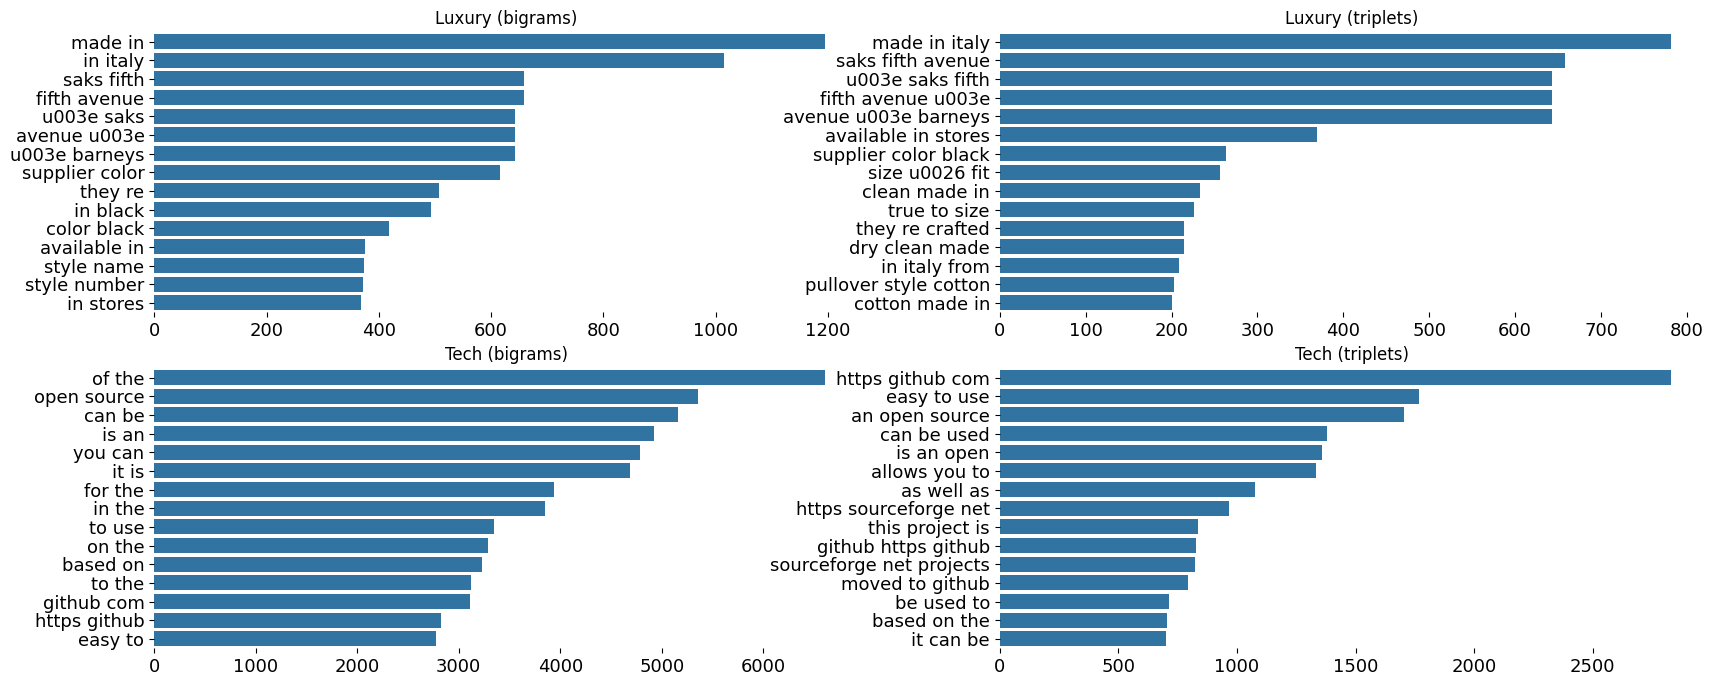

In [52]:
plot_ngrams(
    data=datasets[2:],
    names=dataset_names[2:]
)